Im exploring  the Iris Dataset with a new library called pandas.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Undertanding the dataset  and what load iris is giving us.
- This is a dictionary but with more functionalities.

In [7]:
iris = load_iris()
print(type(iris))
dir(iris)
iris?

<class 'sklearn.utils._bunch.Bunch'>


Type:        Bunch
String form:
{'data': array([[5.1, 3.5, 1.4, 0.2],
           [4.9, 3. , 1.4, 0.2],
           [4.7, 3.2, 1.3, 0.2],
           <...> ength (cm)', 'petal width (cm)'], 'filename': 'iris.csv', 'data_module': 'sklearn.datasets.data'}
Length:      8
File:        ~/miniconda3/lib/python3.12/site-packages/sklearn/utils/_bunch.py
Docstring:  
Container object exposing keys as attributes.

Bunch objects are sometimes used as an output for functions and methods.
They extend dictionaries by enabling values to be accessed by key,
`bunch["value_key"]`, or by an attribute, `bunch.value_key`.

Examples
--------
>>> from sklearn.utils import Bunch
>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print(iris['target_names'])
print(iris['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
## There are 3 species and each is labled 0, 1 and 2
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['class'])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     class  
0      0.0  
1

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

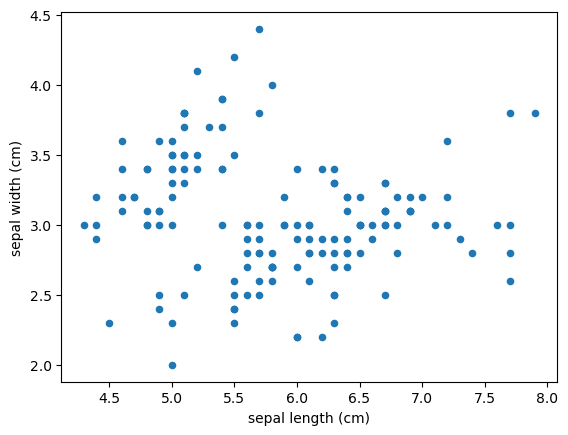

In [12]:
df.plot(kind = 'scatter', 
        x = 'sepal length (cm)', 
        y = 'sepal width (cm)',)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

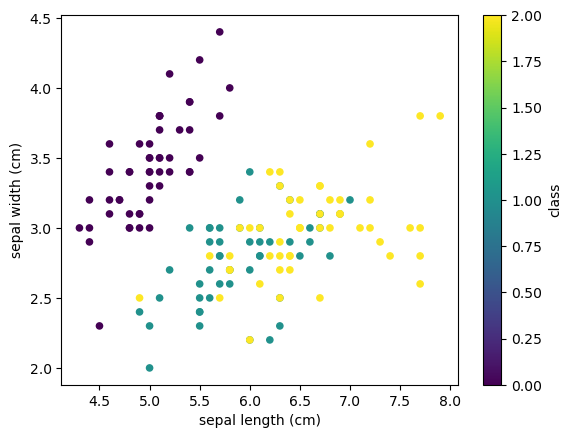

In [13]:
##Color to differentciate between each species
df.plot(kind = 'scatter', 
        x = 'sepal length (cm)', 
        y = 'sepal width (cm)',
       c = 'class')

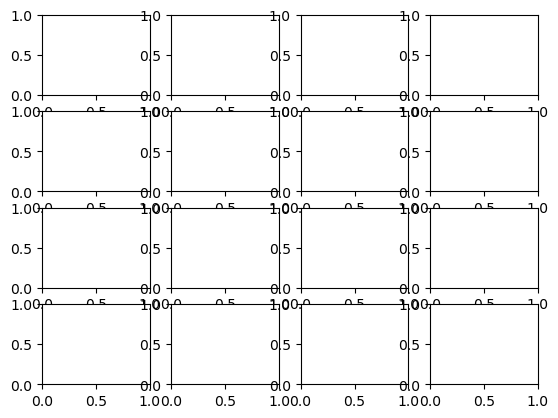

In [ ]:
#How to generate multiple plots
fig, ax = plt.subplots(4,4)

The visualization compares a feature against the others.

In these plots, we can observe several key patterns:
Along the diagonal, we see perfect correlation represented by a 45-degree line. This is expected, as each point perfectly correlates with itself.
As we move away from the diagonal, we see varying degrees of scatter in the plots, indicating different levels of correlation between features. 

The more tightly clustered the points are along a diagonal line, the stronger the correlation between those two features. Conversely, more scattered plots indicate weaker correlations.


However, the these plots make it challenging to distinguish between the three iris species. By color-coding each species, we can better visualize how the features vary across different species and identify any species-specific patterns in the relationships between features.

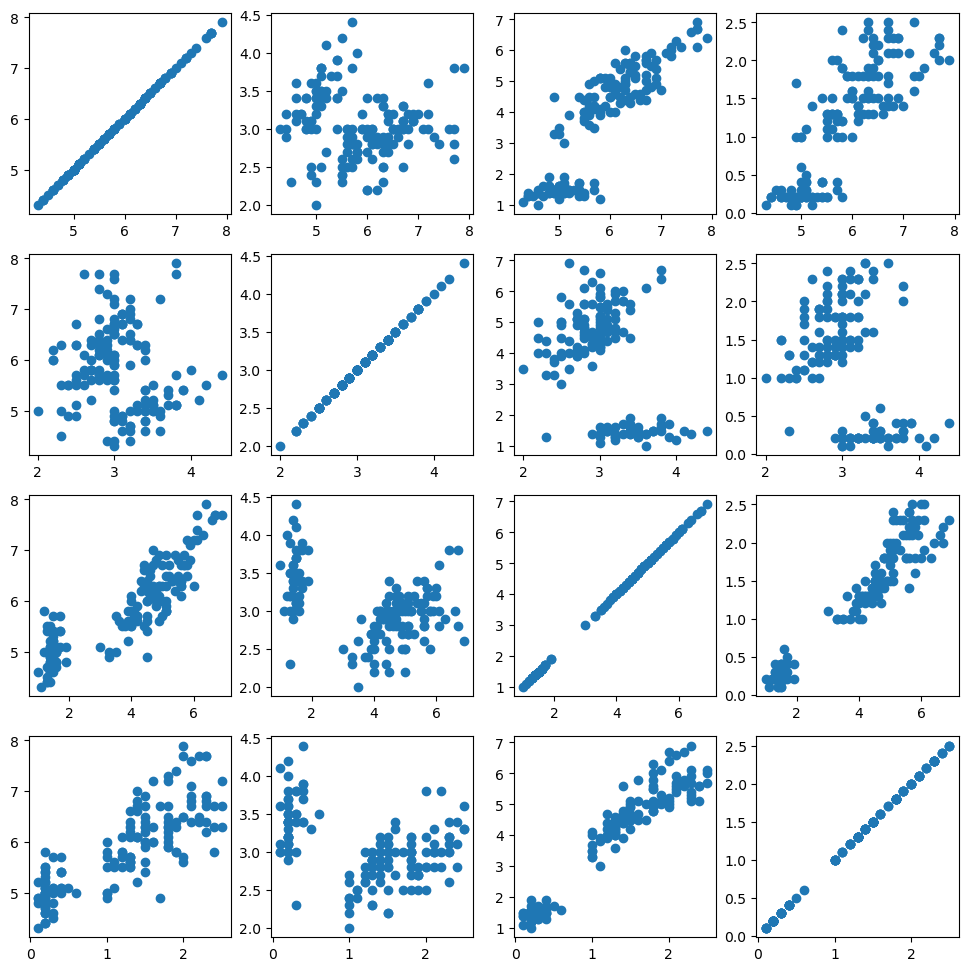

In [ ]:
fig, ax = plt.subplots(4,4, figsize = (12, 12))#change the size of the blobs
for r, ar in enumerate(ax):
    for c, ac in enumerate(ar):
        ac.scatter(x = df.iloc[:, r],
                   y = df.iloc[:, c],)

In [ ]:
def addcolor(species):
    if species == 0:
        return 'red'
    if species == 1:
        return 'blue'
    return 'yellow'

In [ ]:
df['colors'] = df['class'].apply(addcolor)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     class  colors  
0     

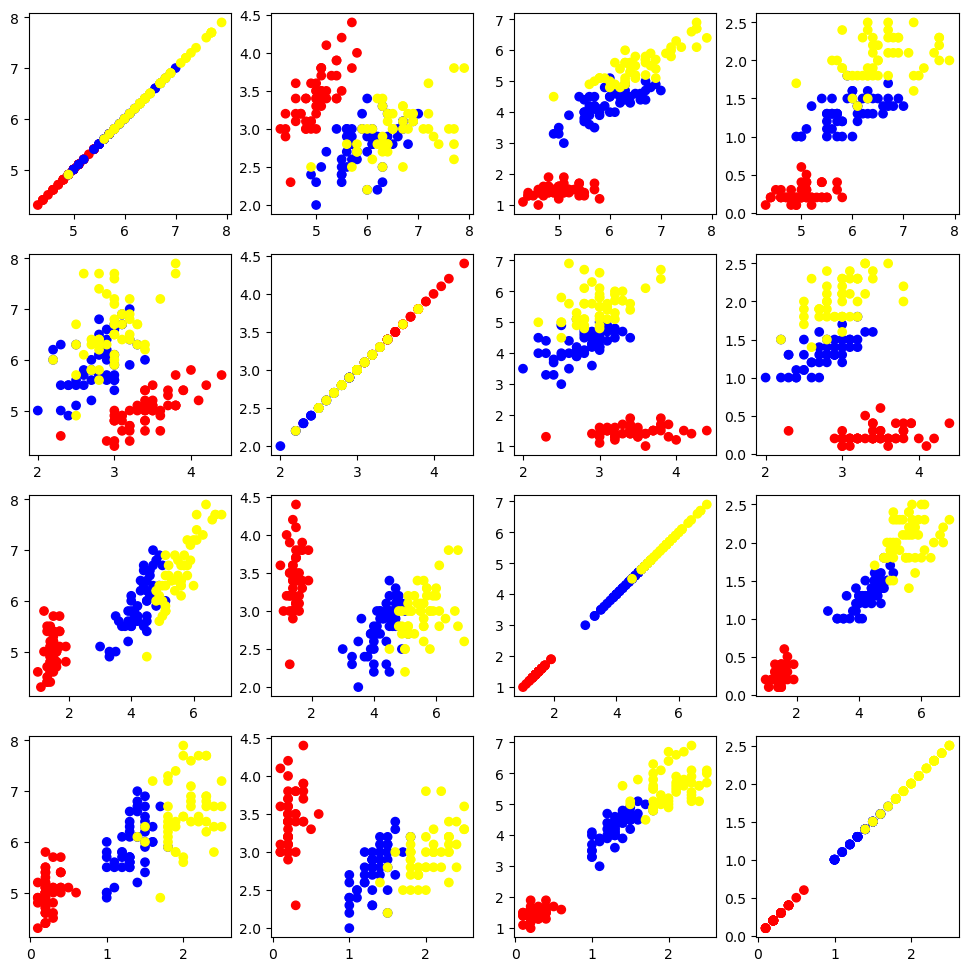

In [ ]:
fig, ax = plt.subplots(4,4, figsize = (12, 12))#change the size of the blobs
for r, ar in enumerate(ax):
    for c, ac in enumerate(ar):
        ac.scatter(x = df.iloc[:, r],
                   y = df.iloc[:, c],
                  c = df.colors)

Here we see the blue and yellow are always bunched up together and the red is always separate.

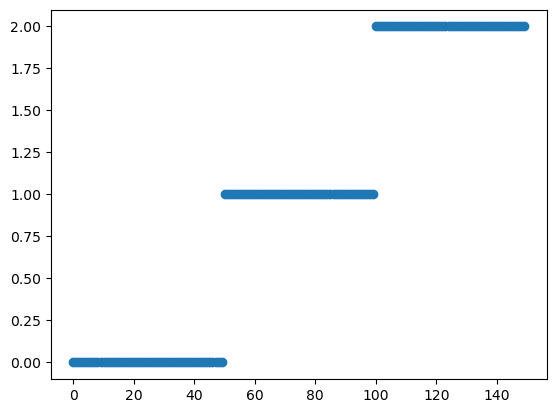

In [20]:
plt.plot(df['class'], 'o')

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:4], df.iloc[:,4])
print(y_test.shape)

(38,)


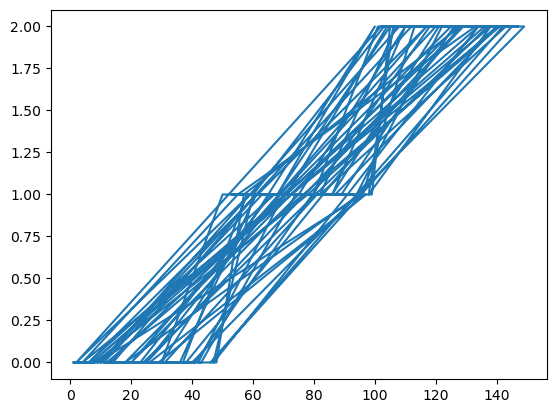

In [31]:
plt.plot(y_train)

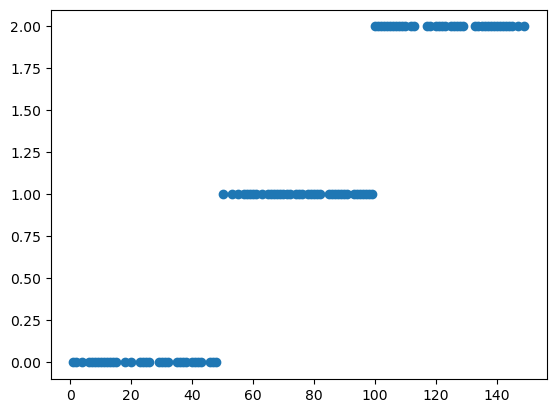

In [32]:
plt.plot(y_train, 'o')

In [33]:
print(x_train, x_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
120                6.9               3.2                5.7               2.3
69                 5.6               2.5                3.9               1.1
25                 5.0               3.0                1.6               0.2
129                7.2               3.0                5.8               1.6
13                 4.3               3.0                1.1               0.1
..                 ...               ...                ...               ...
14                 5.8               4.0                1.2               0.2
61                 5.9               3.0                4.2               1.5
36                 5.5               3.5                1.3               0.2
37                 4.9               3.6                1.4               0.1
58                 6.6               2.9                4.6               1.3

[112 rows x 4 columns]      sepal length (cm)  sepal width (cm)

In [34]:
def distances(a, b):
    return np.sum((a-b)**2)

In [39]:
r1 = x_test.iloc[0]
r2 = x_train.iloc[0]

In [40]:
print(distances(r1, r2))

0.4900000000000002


In [48]:
d = x_train.iloc[5:10, :].apply(lambda r: distances(r1, r2), axis = 1)
print(d.shape)
print(d.size)
print(d)

(5,)
5
11    0.49
63    0.49
93    0.49
66    0.49
23    0.49
dtype: float64


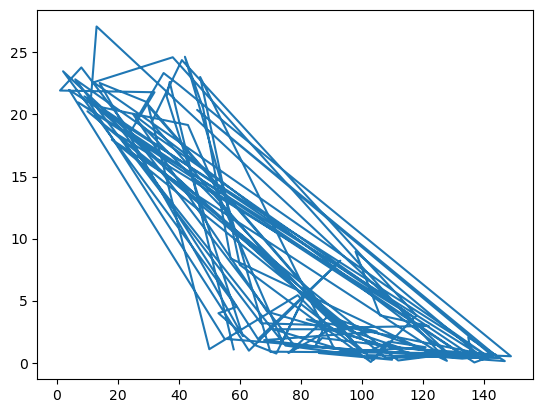

In [52]:
d = x_train.apply(lambda r: distances(r1, r), axis = 1)
plt.plot(d)

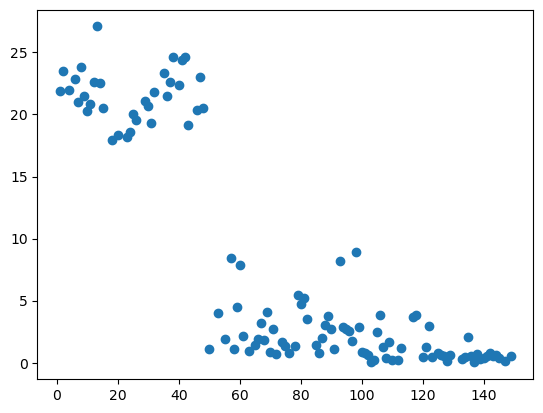

In [53]:
plt.plot(d, 'o')

In [60]:
np.min(d)
a = np.argmin(d)

In [62]:
print(y_train.iloc[a])
print(y_test.iloc[0])

2.0
2.0
